# Solution

## Read the column description and ensure you understand each attribute well

In [1]:
# importing all required Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
# import pandas_profiling

In [2]:
bank_df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
print(f'shape of DataFrame :   {bank_df.shape}')
bank_df.info()

shape of DataFrame :   (5000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [3]:
bank_df.describe() 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [4]:
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Univariate analysis

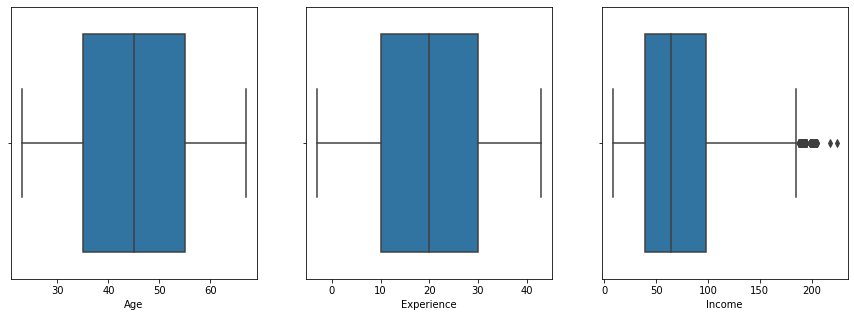

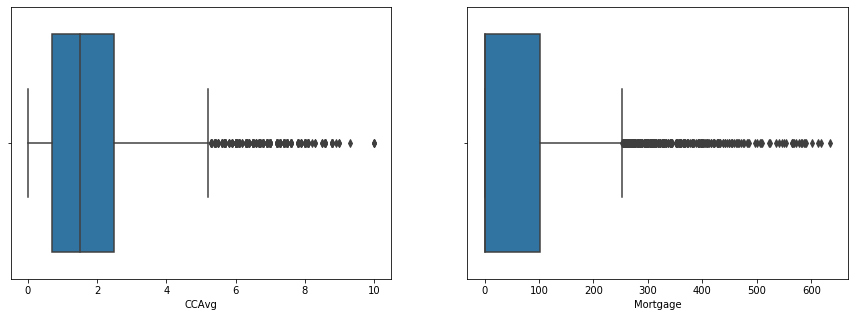

In [5]:
f, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x=bank_df['Age'], data=bank_df,  ax=axes[0])
sns.boxplot(x=bank_df['Experience'], data=bank_df,  ax=axes[1])
sns.boxplot(x=bank_df['Income'], data=bank_df,  ax=axes[2])
f, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x=bank_df['CCAvg'], data=bank_df,  ax=axes[0])
sns.boxplot(x=bank_df['Mortgage'], data=bank_df,  ax=axes[1])

by the above box plots we can see lots of outliers in cc Avg and Mortgate column 

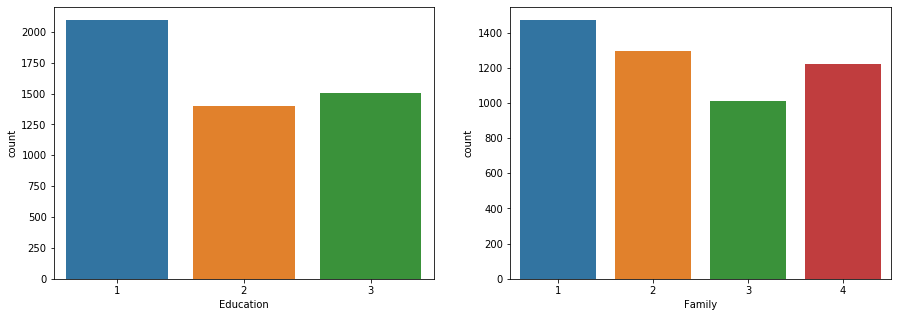

In [6]:
# 1: Undergrad; 2: Graduate;3: Advanced/Professional
f, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x="Education", data=bank_df, ax=axes[0])
sns.countplot(x="Family", data=bank_df, ax= axes[1])

from the data we can see that there are more undergrauate and customer with one falily members are lot 

- 42% of the candidates are graduated, while 30% are professional and 28% are Undergraduate.
- Around 29% of the customer’s family size is 1.

## Multivariate analysis

lets see the correlation between all the attributes first

In [7]:
bank_correlation = bank_df.corr()
bank_correlation

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


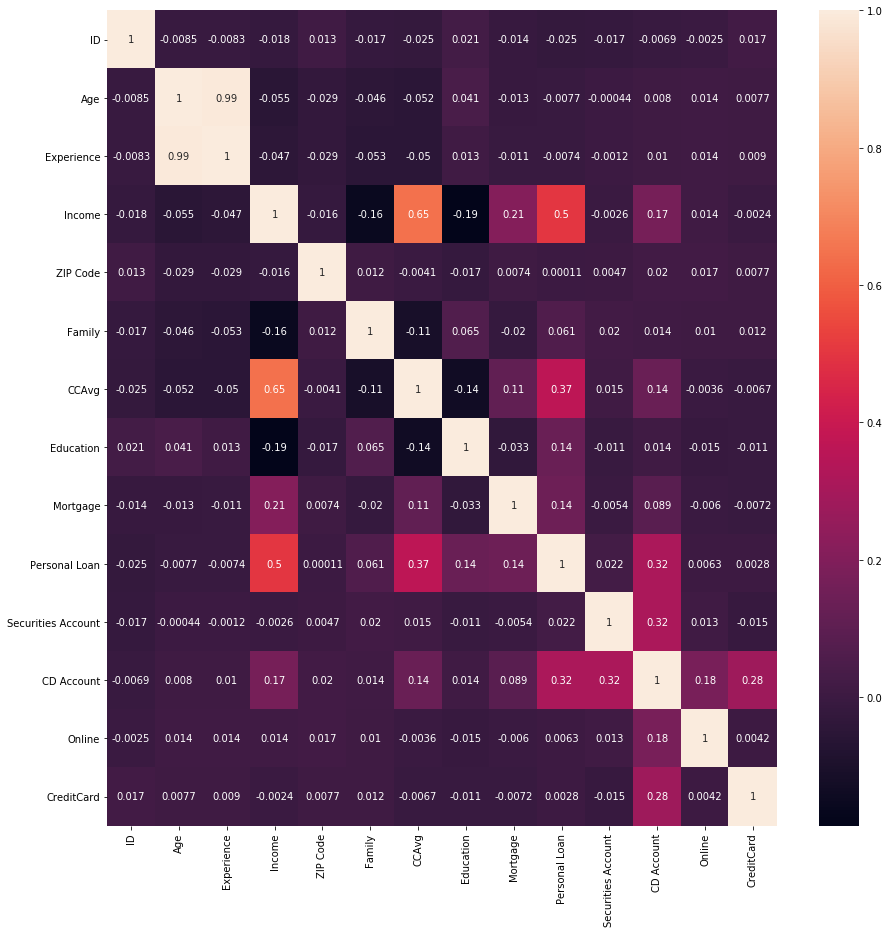

In [8]:
f, axes = plt.subplots(1, 1, figsize=(15, 15))
sns.heatmap(bank_correlation, 
            xticklabels = bank_correlation.columns.values,
            yticklabels = bank_correlation.columns.values,
            annot = True);

with this we can see the corelation between the columns so out target variable in this problem statement is 'Personal Loan'   lets compare the relation induvally 

In [9]:
# sns.pairplot(bank_df, diag_kind='kde')

lets check Relation Between the target Variable and other variable 

Personal Loan     0    1
Education               
1              2003   93
2              1221  182
3              1296  205
Personal Loan     0    1
Family                  
1              1365  107
2              1190  106
3               877  133
4              1088  134
Personal Loan     0    1
CD Account              
0              4358  340
1               162  140


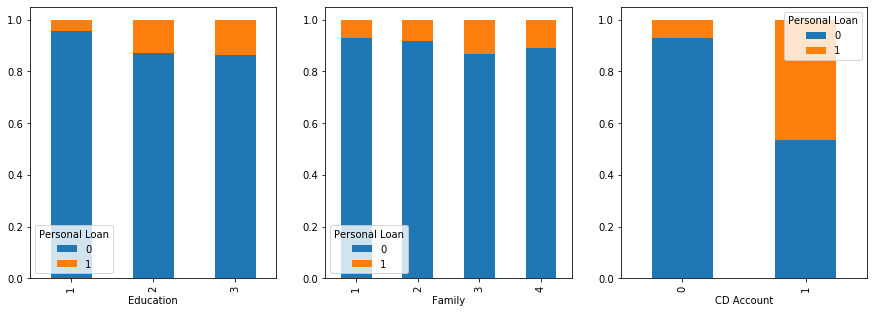

In [10]:
f, axes = plt.subplots(1, 3,figsize=(15,5))
bank_crossTab = pd.crosstab(bank_df['Education'],bank_df['Personal Loan'])
print(bank_crossTab)
bank_crossTab.div(bank_crossTab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=axes[0])

bank_crossTab = pd.crosstab(bank_df['Family'],bank_df['Personal Loan'])
print(bank_crossTab)
bank_crossTab.div(bank_crossTab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=axes[1])

bank_crossTab = pd.crosstab(bank_df['CD Account'],bank_df['Personal Loan'])
print(bank_crossTab)
bank_crossTab.div(bank_crossTab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=axes[2])

- from the above graph (Education), we can see that more educated people have higher probablity of getting loan
- from the above graph ( family ), there is no much affect on probablity with number of family members 
- with the above graph(CD account), customer with CD Account have higher probablity in buying the loan 

Personal Loan     0    1
Online                  
0              1827  189
1              2693  291
Personal Loan          0    1
Securities Account           
0                   4058  420
1                    462   60
Personal Loan     0    1
CreditCard              
0              3193  337
1              1327  143


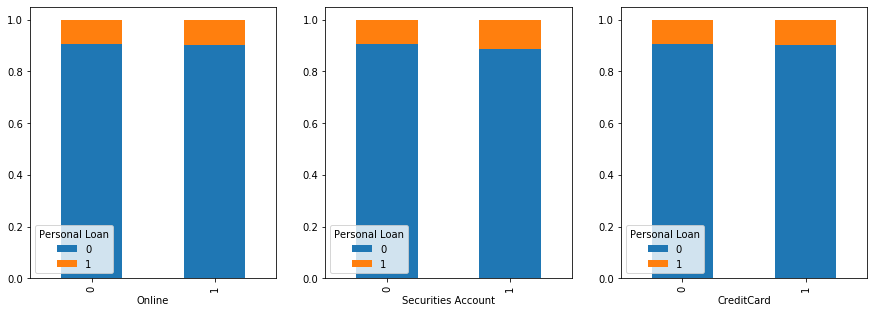

In [11]:
f, axes = plt.subplots(1, 3, figsize=(15, 5))
bank_crossTab = pd.crosstab(bank_df['Online'],bank_df['Personal Loan'])
print(bank_crossTab)
bank_crossTab.div(bank_crossTab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=axes[0])

bank_crossTab = pd.crosstab(bank_df['Securities Account'],bank_df['Personal Loan'])
print(bank_crossTab)
bank_crossTab.div(bank_crossTab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=axes[1])

bank_crossTab = pd.crosstab(bank_df['CreditCard'],bank_df['Personal Loan'])
print(bank_crossTab)
bank_crossTab.div(bank_crossTab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,  ax=axes[2])

from the above graph(Credit card ) not much probablity difference with customer with CreditCard or without CreditCard. and its the same with online  and security Account 

## Strategies to address the different data challenges such as data pollution, outliers and missing values

### Checking for any missing values in the record

In [12]:
bank_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

above output shows that we dont have any null values to treat

### outlier treatment
we know that Mortgage contains outliers from the above analysis, so lets start withh that 

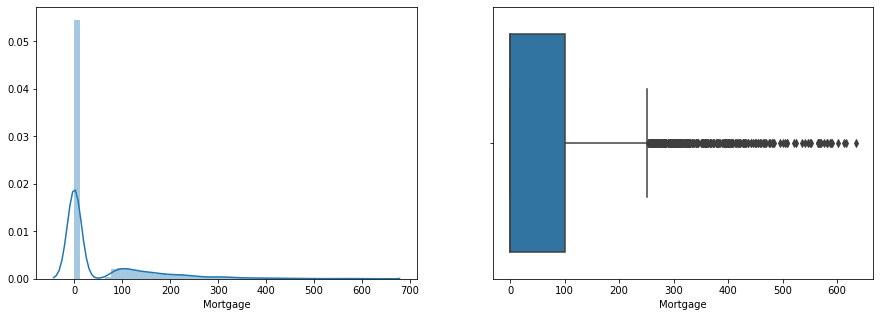

In [13]:
f, axes = plt.subplots(1, 2, figsize=(15,5))
sns.distplot(bank_df['Mortgage'], ax=axes[0])
sns.boxplot(x=bank_df['Mortgage'], data=bank_df, ax=axes[1])

the data is rigt skewed, we will use calculate z-scores for removing outliers 

In [14]:
bank_df['Mortgage_zscore'] = np.abs(stats.zscore(bank_df['Mortgage']))
bank_df  = bank_df[bank_df['Mortgage_zscore'] < 3]
bank_df.drop('Mortgage_zscore', axis=1, inplace=True)

In [15]:
bank_df.shape

(4895, 14)

here we removed more than 100 outliers

## Target Column Distribution - In our case 'Personal Loan' is Target Variable

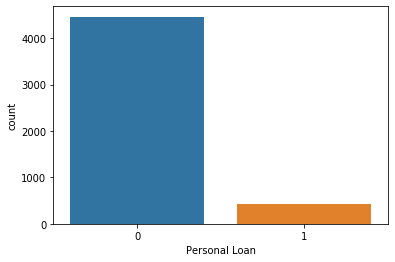

In [16]:
sns.countplot(x="Personal Loan", data=bank_df)

this data have lost are customer data where personal loan was rejected

## Data Distribution of 'Personal Loan' across all variables

Text(0.5, 1.0, 'Income Distribution')

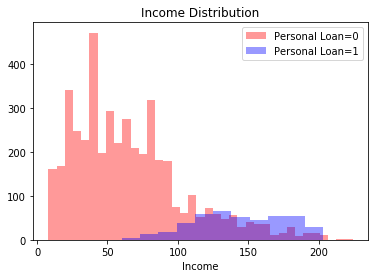

In [17]:
# f, axes = plt.subplots(1, 3, figsize=(15,5))
# sns.distplot(bank_df[bank_df["Personal Loan"] == 0]['Income'], color = 'r',label='Personal Loan=0',kde=False, ax=axes[0])
# sns.distplot(bank_df[bank_df["Personal Loan"] == 1]['Income'], color = 'b',label='Personal Loan=1',kde=False, ax=axes[0])
sns.distplot(bank_df[bank_df["Personal Loan"] == 0]['Income'], color = 'r',label='Personal Loan=0',kde=False)
sns.distplot(bank_df[bank_df["Personal Loan"] == 1]['Income'], color = 'b',label='Personal Loan=1',kde=False)
plt.legend()
plt.title("Income Distribution")

Text(0.5, 1.0, 'CCAvg Distribution')

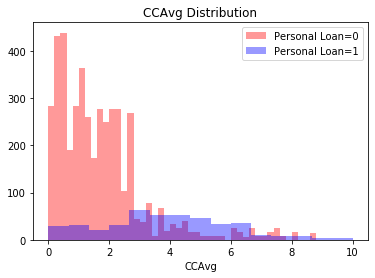

In [18]:
sns.distplot(bank_df[bank_df["Personal Loan"] == 0]['CCAvg'], color = 'r',label='Personal Loan=0',kde=False)
sns.distplot(bank_df[bank_df["Personal Loan"] == 1]['CCAvg'], color = 'b',label='Personal Loan=1',kde=False)
plt.legend()
plt.title("CCAvg Distribution")

Text(0.5, 1.0, 'Experience Distribution')

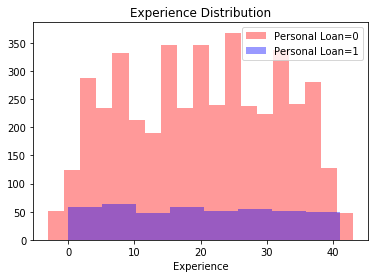

In [19]:
sns.distplot(bank_df[bank_df["Personal Loan"] == 0]['Experience'], color = 'r',label='Personal Loan=0',kde=False)
sns.distplot(bank_df[bank_df["Personal Loan"] == 1]['Experience'], color = 'b',label='Personal Loan=1',kde=False)
plt.legend()
plt.title("Experience Distribution")

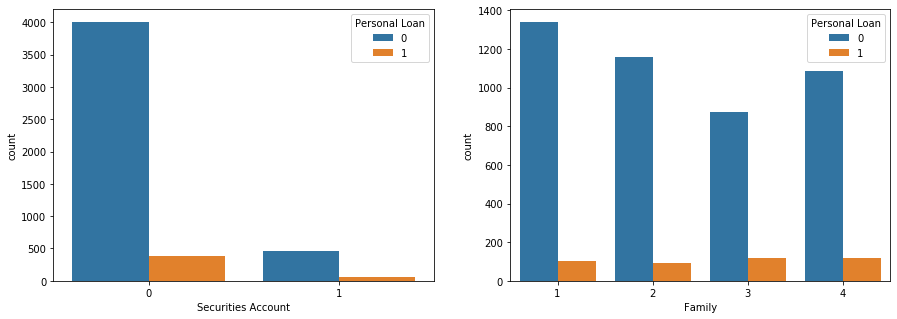

In [20]:
f, axes = plt.subplots(1, 2, figsize=(15,5))
sns.countplot(x='Securities Account',data=bank_df,hue='Personal Loan', ax=axes[0])
sns.countplot(x='Family',data=bank_df,hue='Personal Loan', ax=axes[1])

Text(0.5, 1.0, 'Education vs Income Boxplot')

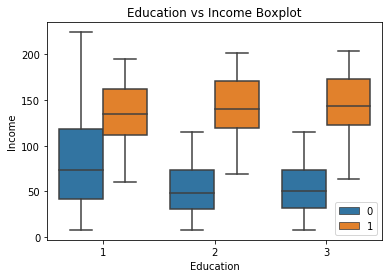

In [21]:
sns.boxplot(x='Education',data=bank_df,hue='Personal Loan',y='Income')
plt.legend(loc='lower right')
plt.title("Education vs Income Boxplot")


Text(0.5, 1.0, 'Family vs Income Boxplot')

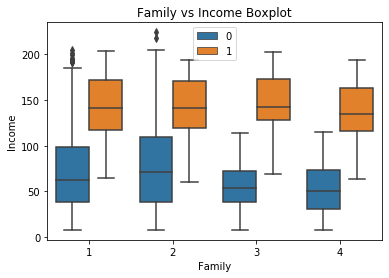

In [22]:
sns.boxplot(x='Family',data=bank_df,hue='Personal Loan',y='Income')
plt.legend(loc='upper center')
plt.title("Family vs Income Boxplot")

From the above all graph inthis sesion 
- Income Distribution vs Personal Loan : Income have left skewed
- Experiance : we are not able to conclude probablity are higher

## Load the data into a data-frame. The data-frame should have data and column description.

In [23]:
bank_dataFrame = bank_df.copy()
print(bank_dataFrame.shape)

(4895, 14)


## Ensure the attribute types are correct. If not, take appropriate actions.

In [24]:
bank_dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4895 entries, 0 to 4999
Data columns (total 14 columns):
ID                    4895 non-null int64
Age                   4895 non-null int64
Experience            4895 non-null int64
Income                4895 non-null int64
ZIP Code              4895 non-null int64
Family                4895 non-null int64
CCAvg                 4895 non-null float64
Education             4895 non-null int64
Mortgage              4895 non-null int64
Personal Loan         4895 non-null int64
Securities Account    4895 non-null int64
CD Account            4895 non-null int64
Online                4895 non-null int64
CreditCard            4895 non-null int64
dtypes: float64(1), int64(13)
memory usage: 573.6 KB


## Create the training set and test set in ration of 70:30

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

In [26]:
X = bank_dataFrame.drop('Personal Loan',axis=1)
y = bank_dataFrame['Personal Loan']

X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3671, 13) (1224, 13) (3671,) (1224,)


## Transform the data i.e. scale / normalize if required

In [27]:
from sklearn import preprocessing

In [28]:
col_names = bank_dataFrame.columns
scaler = preprocessing.StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

print(scaled_X_train.shape, scaled_X_test.shape, y_train.shape, y_test.shape)

(3671, 13) (1224, 13) (3671,) (1224,)


lets create some metod for code reusablity 

In [29]:
def modelReport(test, predict):
    print(f'Classification Report :\n{classification_report(y_test, y_pred)}\n')
    print(f'Model Accuracy Score : {accuracy_score(y_test, y_pred)}\n')
    print(f'Confusion Matrix :\n{confusion_matrix(y_test, y_pred)}\n')
    return classification_report(y_test, y_pred), accuracy_score(y_test, y_pred), confusion_matrix(y_test, y_pred)
    
def roc_curve_report(model,X_test, y_test):
    model_prob = model.predict_proba(X_test)
    falsePositive_rate, truePositive_rate, threshold = roc_curve(y_test, model_prob[:,1])
    roc_auc = auc(falsePositive_rate, truePositive_rate)
    print(f'ROC curv : {roc_auc}')
    return(falsePositive_rate, truePositive_rate, threshold, roc_auc)

## First create Logistic Regression algorithm. Note the model performance.

- Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.
- Logistic regression is an estimation of Logit function. Logit function is simply a log of odds in favor of the event.
- This function creates an S-shaped curve with the probability estimate, which is very similar to the required stepwise function

In [30]:
logReg_model = LogisticRegression()
logReg_model.fit(scaled_X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_pred = logReg_model.predict(scaled_X_test)
clssReport , auc_score, conf_matrix = modelReport(y_test, y_pred)

Classification Report :
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1117
           1       0.82      0.62      0.71       107

    accuracy                           0.96      1224
   macro avg       0.89      0.80      0.84      1224
weighted avg       0.95      0.96      0.95      1224


Model Accuracy Score : 0.9550653594771242

Confusion Matrix :
[[1103   14]
 [  41   66]]



its pretty good prediction after the scaling process

## Create Roc Curve and calculate the fpr and tpr for all thresholds of the classification 

In [32]:
logReg_prob = logReg_model.predict_proba(scaled_X_test)
falsePositive_rate, truePositive_rate, threshold = roc_curve(y_test, logReg_prob[:,1])
roc_auc = auc(falsePositive_rate, truePositive_rate)
print(roc_auc)

0.9544758573950585


In [33]:
fP_rate, tP_rate, threshold, roc_auc = roc_curve_report(logReg_model, scaled_X_test, y_test)

ROC curv : 0.9544758573950585


## Logistic Regression with Hyper Parameter Tuning using GridSearchCV

In [34]:
penalty = ['l1', 'l2','elasticnet']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)
print(hyperparameters)
grid = GridSearchCV(logReg_model, hyperparameters, cv=5, verbose=0)

{'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]), 'penalty': ['l1', 'l2', 'elasticnet']}


In [35]:
best_model = grid.fit(scaled_X_train, y_train)
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.0


In [36]:
best_model.predict(scaled_X_train)

array([0, 0, 0, ..., 0, 0, 0])

we can see that Grid searchh have predicted best penalty l2 and c value as 1 which has good accuricy 

## Print Best accuracy and Best Parameters using Confusion Matrix & Print Classification Report to check precision, recall & F1 Score

In [37]:
best_logReg_model = grid.best_estimator_
pred_train = best_logReg_model.predict(scaled_X_train)
pred_test = best_logReg_model.predict(scaled_X_test)
print("Accuracy on train is:",accuracy_score(y_train,pred_train))
print("Accuracy on test is:",accuracy_score(y_test,pred_test))

Accuracy on train is: 0.9515118496322528
Accuracy on test is: 0.9550653594771242


In [38]:
y_pred = best_logReg_model.predict(scaled_X_test)
log_clssReport , log_auc_score, log_conf_matrix =  modelReport(y_test, y_pred)

Classification Report :
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1117
           1       0.82      0.62      0.71       107

    accuracy                           0.96      1224
   macro avg       0.89      0.80      0.84      1224
weighted avg       0.95      0.96      0.95      1224


Model Accuracy Score : 0.9550653594771242

Confusion Matrix :
[[1103   14]
 [  41   66]]



In [39]:
log_fP_rate, log_tP_rate, log_threshold, log_roc_auc = roc_curve_report(best_logReg_model, scaled_X_test, y_test)

ROC curv : 0.9544758573950585


Actually after prediction using hyperparameter tuning its teh same , its resonalble cuz l2 was default penalty so it will be same only 

## Build KNN algorithm and explain why that algorithm in the comment lines.

- kNN is a very popular algorithm Its popularity springs from the fact that it is very easy to understand and interpret yet many times its accuracy is comparable or even better than other, more complicated algorithms.
- KNN is a supervised algorithm, it is non-parametric and lazy (instance-based).

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn_model= KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(scaled_X_test)
clssReport , auc_score, conf_matrix = modelReport(y_test, y_pred)

Classification Report :
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1117
           1       0.00      0.00      0.00       107

    accuracy                           0.91      1224
   macro avg       0.46      0.50      0.48      1224
weighted avg       0.83      0.91      0.87      1224


Model Accuracy Score : 0.9125816993464052

Confusion Matrix :
[[1117    0]
 [ 107    0]]



In [42]:
fP_rate, tP_rate, threshold, roc_auc = roc_curve_report(knn_model, scaled_X_test, y_test)

ROC curv : 0.5


logistic Regression compared with KNN the accuracy  , logistic works better , let do hyperparameter tuning in this 

## K-Nearest Neighbour with Hyper Parameter Tuning using GridSearchCV. Using Grid Search to identify optimum value for K.

In [43]:
params = {'n_neighbors':[1,5,7,9,11,13,25],'metric':["euclidean",'cityblock']}
grid = GridSearchCV(knn_model,param_grid=params,scoring='accuracy',cv=10)
grid.fit(scaled_X_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

0.9504235280180072
{'metric': 'euclidean', 'n_neighbors': 7}


## Rebuild the KNN using the optimum value to achieve best accuracy

In [44]:
best_knn_model = grid.best_estimator_
pred_train = best_knn_model.predict(scaled_X_train) 
pred_test = best_knn_model.predict(scaled_X_test)
print("Accuracy on train is:",accuracy_score(y_train,pred_train))
print("Accuracy on test is:",accuracy_score(y_test,pred_test))


Accuracy on train is: 0.9596840098065922
Accuracy on test is: 0.9575163398692811


## Print Best accuracy and Best Parameters using Confusion Matrix & Print Classification Report to check precision, recall & F1 Score

In [45]:
y_pred = best_knn_model.predict(scaled_X_test)
knn_clssReport , knn_auc_score, knn_conf_matrix =  modelReport(y_test, y_pred)

Classification Report :
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1117
           1       0.92      0.56      0.70       107

    accuracy                           0.96      1224
   macro avg       0.94      0.78      0.84      1224
weighted avg       0.96      0.96      0.95      1224


Model Accuracy Score : 0.9575163398692811

Confusion Matrix :
[[1112    5]
 [  47   60]]



In [46]:
knn_fP_rate, knn_tP_rate, knn_threshold, knn_roc_auc = roc_curve_report(best_knn_model, scaled_X_test, y_test)

ROC curv : 0.9186238171336775


After tuning the accuracyt is way better now


## Build Naive Bayes Classifier on training Dataset and explain why that algorithm in the comment lines

we can consider Naive Bayes because 
- Bayes theorem uses the conditional probability of an event. Events should be mutually exclusive like throwing a dice.
- Bayes Theorem assumes predictors or input features are independent of each other.
- Bayesian probability relates to the degree of belief. It gives the likelihood of an event to occur. It does this with prior knowledge of the condition related to the event

In [47]:
from sklearn.naive_bayes import GaussianNB 

In [48]:
naive_model = GaussianNB()
naive_model.fit(scaled_X_train , y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [49]:
fP_rate, tP_rate, threshold, roc_auc = roc_curve_report(naive_model, scaled_X_test, y_test)

ROC curv : 0.9277939072448732


## Print the accuracy of the model & confusion Matrix for Naïve Bayes Model.

In [50]:
y_pred = naive_model.predict(scaled_X_test)
clssReport , auc_score, conf_matrix = modelReport(y_test, y_pred)

Classification Report :
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1117
           1       0.43      0.60      0.50       107

    accuracy                           0.89      1224
   macro avg       0.69      0.76      0.72      1224
weighted avg       0.91      0.89      0.90      1224


Model Accuracy Score : 0.8946078431372549

Confusion Matrix :
[[1031   86]
 [  43   64]]



## Explain Precision, Recall value & F1 Score using the classification report

so with the above classification report for naive Byas model, we can say that 
- Pression  : 96% of our predictions were correct
- recall : 92%  of the positive cases did you catch
- f1-score : 94% of positive predictions were correct

## Calculate the fpr and tpr for all thresholds of the classification.

 [note: method has be defined in  above  cell]
 
*calculation code you can find it above*

`falsePositive_rate, truePositive_rate, threshold = roc_curve(y_test, model_prob[:,1])`

 refer : `roc_curve_report()` method 


In [51]:
fP_rate, tP_rate, threshold, roc_auc =roc_curve_report(naive_model, scaled_X_test, y_test)
print(f'False Positive rate \n:{fP_rate}')
print(f'True Positive rate \n:{tP_rate}')
print(f'threshold rate \n:{threshold}')

ROC curv : 0.9277939072448732
False Positive rate 
:[0.00000000e+00 0.00000000e+00 8.95255148e-04 8.95255148e-04
 1.79051030e-03 1.79051030e-03 2.68576544e-03 2.68576544e-03
 3.58102059e-03 3.58102059e-03 4.47627574e-03 4.47627574e-03
 7.16204118e-03 7.16204118e-03 8.05729633e-03 8.05729633e-03
 8.95255148e-03 8.95255148e-03 9.84780662e-03 9.84780662e-03
 1.07430618e-02 1.07430618e-02 1.70098478e-02 1.70098478e-02
 2.86481647e-02 2.86481647e-02 3.13339302e-02 3.13339302e-02
 3.58102059e-02 3.58102059e-02 4.11817368e-02 4.11817368e-02
 4.56580125e-02 4.56580125e-02 4.65532677e-02 4.65532677e-02
 5.01342883e-02 5.01342883e-02 5.55058192e-02 5.55058192e-02
 5.90868397e-02 5.90868397e-02 6.62488809e-02 6.62488809e-02
 6.89346464e-02 6.89346464e-02 6.98299015e-02 6.98299015e-02
 7.07251567e-02 7.07251567e-02 7.25156670e-02 7.25156670e-02
 7.34109221e-02 7.34109221e-02 7.52014324e-02 7.52014324e-02
 7.78871979e-02 7.78871979e-02 8.50492390e-02 8.50492390e-02
 8.59444942e-02 8.59444942e-02 8.

## Firstly, calculate the probabilities of predictions made & then plot the ROC Curve

[note: method has be defined in  above  cell]

*way used to calculate the probablity*
`roc_auc = auc(falsePositive_rate, truePositive_rate)`

In [52]:
naive_fP_rate, naive_tP_rate, naive_threshold, naive_roc_auc = roc_curve_report(naive_model, scaled_X_test, y_test)

ROC curv : 0.9277939072448732


In [53]:
def plot_roc_cur(false_positive_rate, true_positive_rate):  
    plt.plot(false_positive_rate, true_positive_rate, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

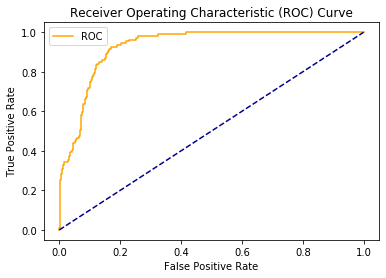

In [54]:
plot_roc_cur(naive_fP_rate, naive_tP_rate)

92 percent of Area under curv AUC which is okay 


## Evaluate the model. Use confusion matrix to evaluate class level metrics i.e.. Precision and recall. Also reflect the overall score of the model.

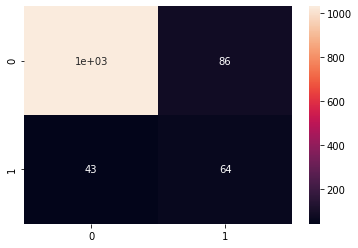

In [55]:
sns.heatmap(conf_matrix,annot = True);
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(naive_model, scaled_X_test, y_test,
#                                  cmap=plt.cm.Blues)

In [56]:
naive_clssReport , naive_auc_score, naive_matrix = modelReport(y_test, y_pred)

Classification Report :
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1117
           1       0.43      0.60      0.50       107

    accuracy                           0.89      1224
   macro avg       0.69      0.76      0.72      1224
weighted avg       0.91      0.89      0.90      1224


Model Accuracy Score : 0.8946078431372549

Confusion Matrix :
[[1031   86]
 [  43   64]]



## Print classification Report for precision, recall & f-1Score for all the models and evaluate them with proper insights

### Naive Bayes

In [57]:
print(naive_clssReport)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1117
           1       0.43      0.60      0.50       107

    accuracy                           0.89      1224
   macro avg       0.69      0.76      0.72      1224
weighted avg       0.91      0.89      0.90      1224



so with the above classification report for naive Byas model, we can say that 
- Pression  : 96% of our predictions were correct
- recall : 92%  of the positive cases did you catch
- f1-score : 94% of positive predictions were correct

### K-Nearest Neighbour

In [58]:
print(knn_clssReport)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1117
           1       0.92      0.56      0.70       107

    accuracy                           0.96      1224
   macro avg       0.94      0.78      0.84      1224
weighted avg       0.96      0.96      0.95      1224



so with the above classification report for K-Nearest Neighbous model, we can say that 
- Pression  : 96% of our predictions were correct
- recall : 100%  of the positive cases did you catch
- f1-score : 98% of positive predictions were correct

### Logistic Regression 

In [59]:
print(log_clssReport)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1117
           1       0.82      0.62      0.71       107

    accuracy                           0.96      1224
   macro avg       0.89      0.80      0.84      1224
weighted avg       0.95      0.96      0.95      1224



so with the above classification report for Logistic Regressions model, we can say that 
- Pression  : 96% of our predictions were correct
- recall : 99%  of the positive cases did you catch
- f1-score : 98% of positive predictions were correct

from above all three model accuracy of Naive Bayes model(Navie Bayes might have got good accuracy if we have done some hyperparameter tuning) is 89% and other two model( KNN and Logistic Regresson ) give 96% accuracy , so those two models are good.


## Roc Curve for Model evaluation and explain the difference among all the models used in your analysis

### Roc Curve for Naive Bayes 

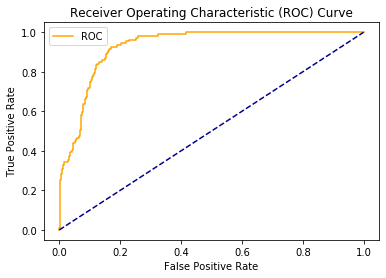

In [60]:
plot_roc_cur(naive_fP_rate, naive_tP_rate)

### Roc Curve for KNN

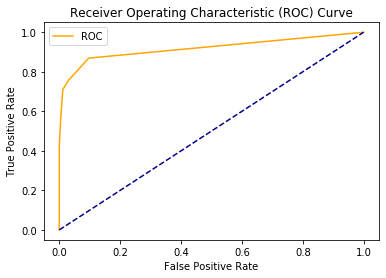

In [61]:
plot_roc_cur(knn_fP_rate, knn_tP_rate)

### Roc Curve for Logistic Regession

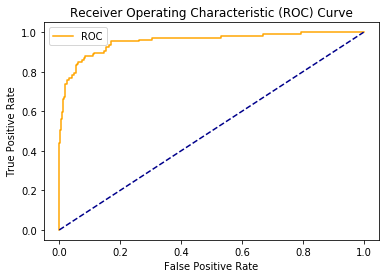

In [62]:
plot_roc_cur(log_fP_rate, log_tP_rate)

with all this graph ae can we can see that all area under the curve are
- naive  bayes :0.9277939072448732
- logistics regression :0.9544758573950585
- knn : 0.9186238171336775


## Calculate the fpr and tpr for all thresholds of the classification

In [63]:
from sklearn.metrics import plot_roc_curve

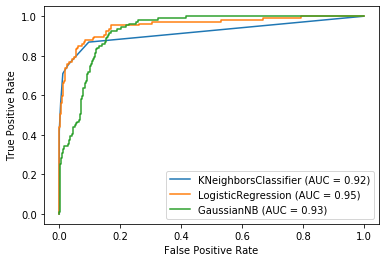

In [64]:
ax = plt.gca()
knn_roc_disp = plot_roc_curve(best_knn_model, scaled_X_test, y_test, ax=ax)
log_roc_disp = plot_roc_curve(best_logReg_model, scaled_X_test, y_test, ax=ax)
naive_roc_disp = plot_roc_curve(naive_model, scaled_X_test, y_test, ax=ax)

based on the Graph we can  depends on what trade-off you prefer. wehther you want Precision/low Recall or low Precision/high Recall 

## Discuss some of the key hyper parameters available for the selected algorithm. What values did you initialize these parameters to?

### K Nerest neighbors

for this model main hyperparameter is considered to be K value.
- algorithm : {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}
- metric : "euclidean",'cityblock',  minkowski, precomputed

I have used this folowing parameter for GridSearchCV

`{'n_neighbors':[1,5,7,9,11,13,25],'metric':["euclidean",'cityblock']}`

### Logistic Regression
for the Logistic Regression 
- penalty : values are C
- c value : 'l1', 'l2', 'elasticnet'

i have use below parameter for my model 

`{'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]), 'penalty': ['l1', 'l2', 'elasticnet']}`

## Regularization techniques used for the model.

Some of the Regularization techniques used in this models are removing outliers and scaling the data ( preprocessing)
otherwise the data didn't not required much Regularization , as we can see from the accurecy  from test vs train data is almost similar

## Range estimate at 95% confidence for the model performance in production.

In [65]:
ALPHA=0.05
bank_dataFrame.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000
mean,2501.736057,45.342594,20.106027,72.010623,93154.203269,2.401634,1.900172,1.887436,48.017773,0.088458,0.104392,0.057610,0.596527,0.294791
std,1445.534182,11.463954,11.470258,44.717543,2127.047673,1.149651,1.709268,0.839485,83.849944,0.283988,0.305800,0.233028,0.490644,0.455995
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1247.500000,35.000000,10.000000,38.000000,91942.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2498.000000,45.000000,20.000000,63.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3757.500000,55.000000,30.000000,93.000000,94608.000000,3.000000,2.500000,3.000000,94.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,361.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
from scipy import mean
mean = mean(bank_dataFrame)
n = len(bank_dataFrame)
std_err = stats.sem(bank_dataFrame)
h = std_err * stats.t.ppf((1 + ALPHA) / 2, n - 1)

In [67]:
start = mean - h
end = mean + h

In [68]:
print(start)

ID                     2500.440404
Age                      45.332319
Experience               20.095746
Income                   71.970542
ZIP Code              93152.296765
Family                    2.400604
CCAvg                     1.898640
Education                 1.886684
Mortgage                 47.942617
Personal Loan             0.088203
Securities Account        0.104118
CD Account                0.057401
Online                    0.596087
CreditCard                0.294382
dtype: float64


In [69]:
print(end)

ID                     2503.031710
Age                      45.352870
Experience               20.116308
Income                   72.050704
ZIP Code              93156.109772
Family                    2.402665
CCAvg                     1.901704
Education                 1.888189
Mortgage                 48.092929
Personal Loan             0.088712
Securities Account        0.104666
CD Account                0.057819
Online                    0.596967
CreditCard                0.295199
dtype: float64


# Conclusion

now we know the differnce and trade of KNN works better so , we use that model to classify the customer to predict whether to accept or reject the presonal Loan Request 